### Load and process results

In [2]:
import pandas as pd

In [3]:
# Load data

int_types = ['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'no_intf']
QPSrange = range(5000, 80001, 5000)

#cpu = []
#l1d = []
#l1i = []
#llc = []
#membw = []
#no_intf = []

run_results = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }

run_achieved_qps = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }




In [4]:
base_path = 'results_part1/'
for iname in int_types:
    # Construct path to results
    if iname == 'no_intf':
        res_path = iname + '/run'
    else:
        res_path = 'ibench-' + iname + '/run'
    # Load each run's results
    for i in range(1, 4):
        data = pd.read_csv(base_path + res_path + str(i) + '.ssv' ,delim_whitespace=True)
        res = list(data['p95'])
        qps = list(data['QPS'])
        run_results[iname].append(res)
        run_achieved_qps[iname].append(qps)
    

### import numpy as np



In [5]:
import numpy as np
from matplotlib import pyplot as plt

[ 5.01543333  9.9998     14.98586667 20.00646667 24.9861     29.9812
 34.93993333 39.9519     44.9538     50.09286667 54.9807     60.01986667
 62.84233333 63.4294     62.19013333 62.50726667]
[0.61953333 0.7928     0.90053333 0.95726667 1.0012     0.99126667
 1.0068     0.9977     1.02403333 1.01276667 1.00003333 1.05933333
 1.6887     1.74916667 1.8019     1.79243333]


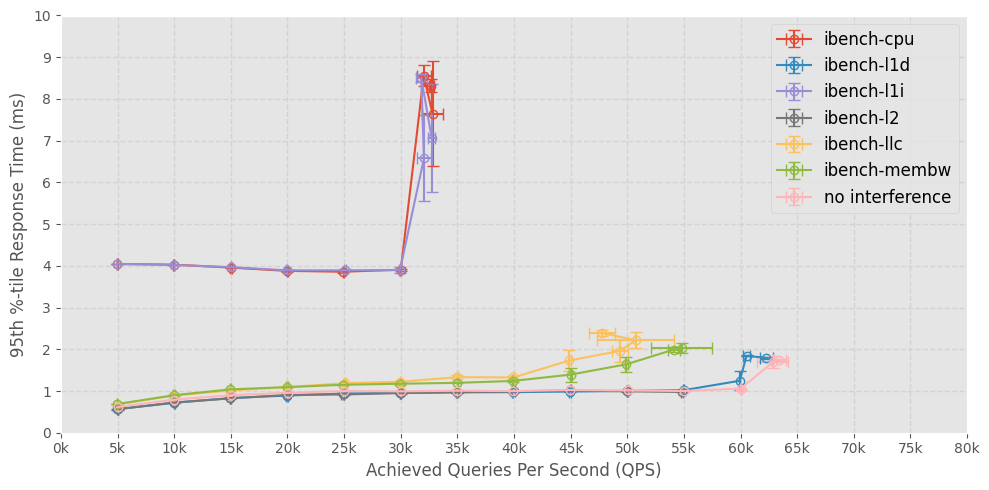

In [77]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5),dpi=100)
fig_ax = fig.gca()

for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_lat = np.array(arrays_lat) / 1000.0
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    arrays_qps = np.array(arrays_qps) / 1000.0
    
    means_lat = np.array([np.mean(k) for k in zip(*arrays_lat)])
    errors_lat = np.array([np.std(k) for k in zip(*arrays_lat)])
    
    means_qps = np.array([np.mean(k) for k in zip(*arrays_qps)])
    errors_qps = np.array([np.std(k) for k in zip(*arrays_qps)])

     
    if key == 'cpu':
        positions = [0,1,2,3,4,5,6,11,14]
    if key == 'l1d':
        positions = list(range(0,len(means_lat)-2))
    if key == 'l1i':
        #print(means_qps)
        positions = [0,1,2,3,4,5,6,7,14]
    if key == 'l2':
        positions = list(range(0,len(means_lat)-5))
    if key == 'llc':
        positions = list(range(0,len(means_lat)-4))
    if key == 'membw':
        positions = list(range(0,len(means_lat)-4))
    if key == 'no_intf':
        positions = list(range(0,len(means_lat)-2))
        print(means_qps)
        print(means_lat)

    means_qps = means_qps[positions]
    means_lat = means_lat[positions]
    errors_lat = errors_lat[positions] 
    errors_qps = errors_qps[positions]
       
    fig_ax.errorbar(means_qps, means_lat, yerr = errors_lat, xerr = errors_qps,
                 marker='o', markerfacecolor = 'none', capsize=4)
                   #errorevery=(1,1))

# Style figure
xlabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(0, 81, 5), xlabs)
ylabs = ['0', '1','2','3','4','5','6','7','8','9','10']
plt.yticks(range(0,11,1), ylabs)
ylabel = '95th %-tile Response Time (ms)'
xlabel = 'Achieved Queries Per Second (QPS)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
legend = ['ibench-cpu', 'ibench-l1d', 'ibench-l1i', 'ibench-l2', 'ibench-llc', 'ibench-membw', 'no interference']
plt.legend(legend, fontsize=12)
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
#fig_ax.set_title('Tail latency for different interferences at memcached', fontsize = 14)
# Save plot
plt.tight_layout()
plt.savefig("plot1.pdf")

In [61]:
errors_lat

array([0.00849405, 0.01152938, 0.01579395, 0.02245371, 0.0089848 ,
       0.01209995, 0.00678872, 0.00276526, 0.00637303, 0.01412901,
       0.01030512])

In [46]:
ex = np.array(run_achieved_qps['no_intf'][0])
len(means_lat)
np.array([0:15])

SyntaxError: invalid syntax (Temp/ipykernel_10460/2330501154.py, line 3)

In [30]:
print(type(means_qps))
example = np.array(means_qps)
#run_achieved_qps['cpu'][0]
#[(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,11),(0,14)]
positions = [0,1,2,3,4,5,6,11,14]
ex = example[positions]
print((ex))


<class 'list'>
[ 5.01543333  9.9998     14.98586667 20.00646667 24.9861     29.9812
 34.93993333 60.01986667 62.19013333]


### OTHER STUFF

(14,)
(16,)
(16,)
(7,)
(7,)
(7,)


array([ 0.        ,  0.        ,  4.96166667,  5.06806667,  4.95186667,
        4.9554    ,  5.0834    ,  2.01953333, -0.1622    , -0.14226667,
       -0.04836667,  0.08076667,  1.05206667, -0.63346667, -0.0336    ,
        0.57346667])

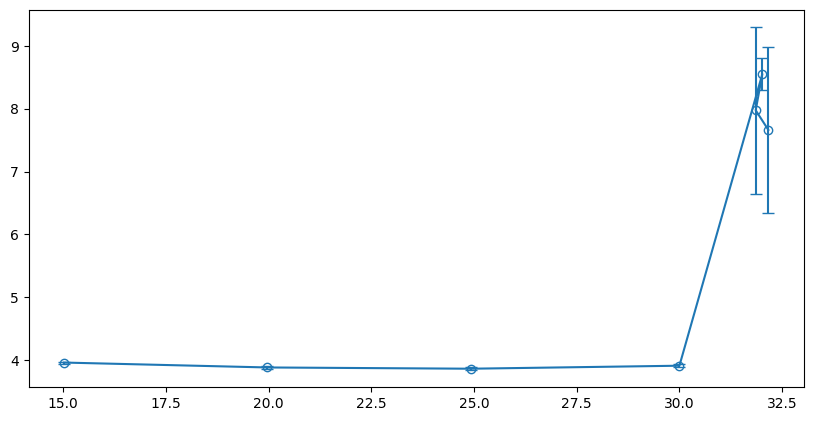

In [86]:
arrays_lat = np.array([np.array(x) for x in run_results['cpu']]) / 1000.0
arrays_qps = np.array([np.array(x) for x in run_achieved_qps['cpu']]) / 1000.0

means_lat = np.array([np.mean(k) for k in zip(*arrays_lat)])
errors_lat = np.array([np.std(k) for k in zip(*arrays_lat)])

means_qps = np.array([np.mean(k) for k in zip(*arrays_qps)])
errors_qps = np.array([np.std(k) for k in zip(*arrays_qps)])
means_qps_diff = np.array(means_qps[1:-1]) - np.array(means_qps[0:-2])
print(means_qps_diff.shape)
means_qps_diff = np.concatenate([[0. , 0.], means_qps_diff])
print(means_qps_diff.shape)
print(means_lat.shape)
means_lat_filter = means_lat[abs(means_qps_diff)>1]
means_qps_filter = means_qps[abs(means_qps_diff)>1]
errors_lat_filter = errors_lat[abs(means_qps_diff)>1]
print(means_lat_filter.shape)
print(means_qps_filter.shape)
print(errors_lat_filter.shape)
fig = plt.figure(figsize=(10,5),dpi=100)
fig_bx = fig.gca()
fig_bx.errorbar(means_qps_filter, means_lat_filter, yerr = errors_lat_filter, 
             marker='o', markerfacecolor = 'none', capsize=4)
means_qps_diff


In [ ]:
for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    
    means_lat = [np.mean(k) for k in zip(*arrays_lat)]
    errors_lat = [np.std(k) for k in zip(*arrays_lat)]
    
    means_qps = [np.mean(k) for k in zip(*arrays_qps)]
    errors_qps = [np.std(k) for k in zip(*arrays_qps)]
    
    plt.plot(means_qps, means_lat)
    

xlabs = ['5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(5000, 80001, 5000), xlabs)

In [ ]:
# Watch out:
# -> mcperf timing is in microseconds
# -> hide the errorbar when the difference is not that great

<Figure size 432x288 with 0 Axes>